#### Wage Analysis Across States and Demographics
- Spring 2025
- by Nicholas Nemkov

In [34]:
import pandas as pd
import numpy as np
import matplotlib as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

Load in the Datasets

In [2]:
adult_df = pd.read_csv('C:/Users/nickn/OneDrive/Desktop/Capstone Project/capstone/data/adult.data', header=None, na_values=" ?")

adult_df.columns = ["age", "workclass", "fnlwgt", "education", "education-num", 
                      "marital-status", "occupation", "relationship", "race", "sex",
                      "capital-gain", "capital-loss", "hours-per-week", "native-country", "salary"]

In [3]:
state_wage_stats = pd.read_excel('C:/Users/nickn/OneDrive/Desktop/Capstone Project/capstone/data/state_M2023_dl.xlsx')

In [4]:
population = pd.read_csv('C:/Users/nickn/OneDrive/Desktop/Capstone Project/capstone/data/NST-EST2023-ALLDATA.csv')

In [207]:
adult_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,education_category,age_decade
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,Higher,30
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Higher,50
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,Secondary,30
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,Secondary,50
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Higher,20


In [5]:
# deal with NA values for adult.data
adult_df.dropna(inplace=True)
print(adult_df.isna().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64


In [208]:
state_wage_stats.head()

,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,00-0000,All Occupations,...,19.88,30.09,46.18,22620,29580,41350,62580,96050,NaN,NaN
1,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,11-0000,Management Occupations,...,47.95,67.22,95.44,50710,73180,99740,139810,198520,NaN,NaN
2,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,11-1011,Chief Executives,...,79.48,102.01,#,65700,123960,165320,212180,#,NaN,NaN
3,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,11-1021,General and Operations Managers,...,49.67,78.25,112.54,48080,72260,103320,162760,234080,NaN,NaN
4,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,11-1031,Legislators,...,*,*,*,18320,19670,24470,45050,55070,True,NaN


In [6]:
print(state_wage_stats.isna().sum())

AREA                0
AREA_TITLE          0
AREA_TYPE           0
PRIM_STATE          0
NAICS               0
NAICS_TITLE         0
I_GROUP             0
OWN_CODE            0
OCC_CODE            0
OCC_TITLE           0
O_GROUP             0
TOT_EMP             0
EMP_PRSE            0
JOBS_1000           0
LOC_QUOTIENT        0
PCT_TOTAL       37676
PCT_RPT         37676
H_MEAN              0
A_MEAN              0
MEAN_PRSE           0
H_PCT10             0
H_PCT25             0
H_MEDIAN            0
H_PCT75             0
H_PCT90             0
A_PCT10             0
A_PCT25             0
A_MEDIAN            0
A_PCT75             0
A_PCT90             0
ANNUAL          35034
HOURLY          37517
dtype: int64


In [212]:
# I will focus on just the state populations in 2023
population.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,ESTIMATESBASE2020,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,POPESTIMATE2023,...,RNATURALCHG2023,RINTERNATIONALMIG2021,RINTERNATIONALMIG2022,RINTERNATIONALMIG2023,RDOMESTICMIG2021,RDOMESTICMIG2022,RDOMESTICMIG2023,RNETMIG2021,RNETMIG2022,RNETMIG2023
0,10,0,0,0,United States,331464948,331526933,332048977,333271411,334914895,...,1.510043,1.133278,3.003867,3.409196,0.000000,0.000000,0.000000,1.133278,3.003867,3.409196
1,20,1,0,0,Northeast Region,57614141,57430477,57243423,57026847,56983517,...,0.976280,1.403074,3.678035,3.947167,-4.823207,-7.881683,-5.671414,-3.420133,-4.203648,-1.724247
2,30,1,1,0,New England,15119994,15057898,15106108,15120739,15159777,...,-0.019551,1.772643,4.532659,5.024221,1.615767,-3.086263,-2.445863,3.388409,1.446396,2.578358
3,30,1,2,0,Middle Atlantic,42494147,42372579,42137315,41906108,41823740,...,1.336417,1.271165,3.370662,3.557656,-7.121462,-9.606391,-6.837920,-5.850297,-6.235729,-3.280264
4,20,2,0,0,Midwest Region,68987296,68969794,68850246,68783028,68909283,...,0.665803,0.802684,2.098649,2.409866,-2.577042,-2.636615,-1.245226,-1.774357,-0.537966,1.164640


### Question 1

- Is a job more demanding based on the higher level of education and the age of the person?
- Does the income level of a job determine how hard a person has to work?

In [7]:
# visualize levels of education
adult_df[['education', 'education-num']].value_counts()

education     education-num
HS-grad       9                9840
Some-college  10               6678
Bachelors     13               5044
Masters       14               1627
Assoc-voc     11               1307
11th          7                1048
Assoc-acdm    12               1008
10th          6                 820
7th-8th       4                 557
Prof-school   15                542
9th           5                 455
12th          8                 377
Doctorate     16                375
5th-6th       3                 288
1st-4th       2                 151
Preschool     1                  45
Name: count, dtype: int64

In [ ]:
# organize lists for education categories
preschool = [1]
primary = [2, 3]
secondary = [4, 5, 6, 7, 8, 9]
higher = [10, 11, 12, 13, 14, 15, 16]

def get_categories(number):
    '''
    Check if a numerical category is part of the 4 education groups.
    '''
    if number in preschool:
        return "Preschool"
    elif number in primary:
        return "Primary"
    elif number in secondary:
        return "Secondary"
    else:
        return "Higher"

# use get_categories function to create a new column with education categories
adult_df['education_category'] = adult_df['education-num'].apply(get_categories)
    

In [9]:
# create a decade column for easier viewing of the age
adult_df["age_decade"] = ((adult_df["age"]) // 10) * 10
mean_hours = adult_df.groupby(["age_decade", "education_category"])["hours-per-week"].mean().reset_index()

# drop Preschool category if needed
drop_preschool = mean_hours[mean_hours['education_category'] != 'Preschool']

# Create line plot using Plotly Express
fig = px.line(drop_preschool, x="age_decade", y="hours-per-week", color="education_category",
              title="<b>Mean Hours Worked Per Week Against Employee Age</b>",
              labels={"age_decade": "Age", "hours-per-week": "Mean Hours Per Week", "education_category": "Education Level"},
              markers=True)

fig.update_layout(
    font=dict(
        color='black'
    ))

fig.show()

In [10]:
# boxplot of weekly hours worked against salary category
fig = px.box(adult_df, x="salary", y="hours-per-week", color="education_category", 
             labels={
                     "education_category": "Education Level",
                     "salary": "Salary Category",
                     "hours-per-week": "Hours Worked per Week"
                 },
             title="Weekly Hours Against Salary Category")
fig.show()

### Question 2

Is there a noticable trend between a person’s salary and their sex? What about their
race?

In [ ]:
# Q2 Part 1)

# calculate total count of salary category by sex
counts = adult_df.groupby(['sex', 'salary']).size().reset_index(name='count')

# stacked bar chart
fig_2a = px.bar(counts, x='sex', y='count', color='salary',
                title="<b>Salary Levels Between Females and Males</b>")


# include black font for title
fig_2a.update_layout(
    font=dict(
        color='black'
    ))

fig_2a.show()

In [21]:
# 100% filled bar chart

# calculate percent of total sex occurences that belong to a salary category
counts['percentage'] = counts.groupby('sex')['count'].transform(lambda x: (x / sum(x)) * 100)

# plot filled bar chart
fig_2b = px.bar(counts, x='sex', y='percentage', color='salary',
                title="<b>Pecentage of Salary Levels Between Females and Males</b>")

fig_2b.update_layout(
    font=dict(
        color='black'
    ))

fig_2b.show()

In [22]:
# race occurences
race_counts = adult_df.groupby(['race', 'salary']).size().reset_index(name='count')
race_counts['percentage'] = race_counts.groupby('race')['count'].transform(lambda x: (x / sum(x)) * 100)

fig_2c = px.bar(race_counts, x='race', y='count', color='salary',
                title="<b>Salary Levels Between Races</b>")

fig_2c.update_layout(
    font=dict(
        color='black'
    ))

fig_2c.show()

fig_2d = px.bar(race_counts, x='race', y='percentage', color='salary',
                title="<b>Percentage of Salary Levels Between Races</b>")

fig_2d.update_layout(
    font=dict(
        color='black'
    ))

fig_2d.show()

Question 3:

In [11]:
# machine learning import packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [12]:
# prepare adult_df data for regression

# split to features and target
features = adult_df.drop("salary", axis=1)
target = adult_df["salary"]

# one-hot encode categorical features
features = pd.get_dummies(features, drop_first=True)

In [13]:
# split data 70/30 train/test
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [14]:
# standardize numerical features
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)

In [15]:
# fit model
model = LogisticRegression()
model.fit(features_train, target_train)

LogisticRegression()

In [16]:
predictions = model.predict(features_test)

print("Accuracy:\n", accuracy_score(predictions, target_test))
print("")
print("Classification Report:\n", classification_report(target_test, predictions))

Accuracy:
 0.850922753895458

Classification Report:
               precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      6767
        >50K       0.75      0.61      0.67      2282

    accuracy                           0.85      9049
   macro avg       0.81      0.77      0.79      9049
weighted avg       0.84      0.85      0.85      9049



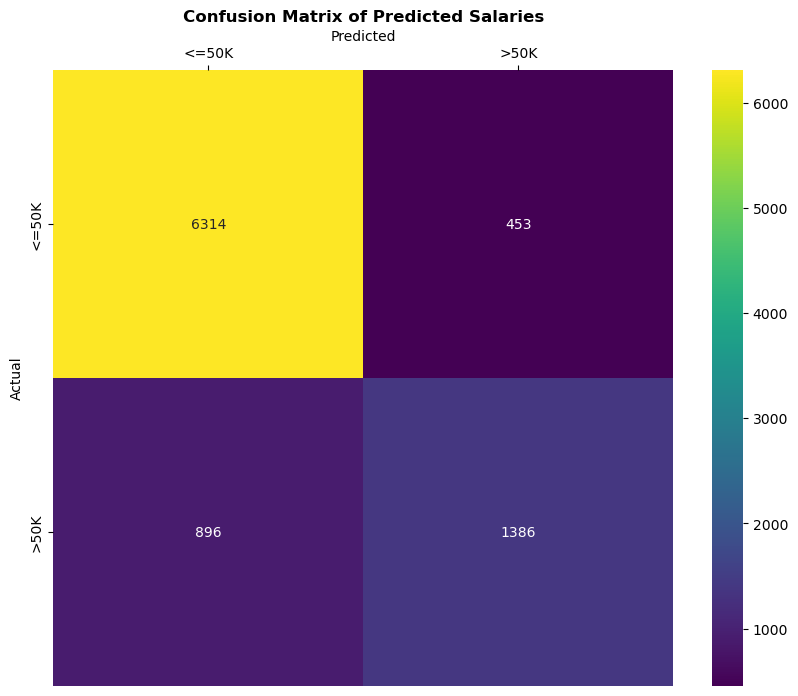

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(target_test, predictions)

labels = ["<=50K", ">50K"]

plt.figure(figsize=(10, 8))

matrix = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=sns.color_palette("viridis", as_cmap=True), xticklabels=labels, yticklabels=labels)

matrix.xaxis.set_ticks_position("top")  # Move x-axis to top
matrix.xaxis.set_label_position("top")  
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of Predicted Salaries", weight='bold')

plt.show()

In [18]:
# Feature importance (absolute values)
feature_importance = np.abs(model.coef_[0])

importance_df = pd.DataFrame({"Feature": features.columns, "Importance": feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

In [19]:
# combine one-hot encoded features into the original feature
importance_df["Original Feature"] = importance_df["Feature"].str.split("_").str[0]
aggregated_importance = importance_df.groupby("Original Feature")["Importance"].sum()
aggregated_importance = aggregated_importance.sort_values(ascending=False)

In [20]:
# feature importance bar plot
top_5 = aggregated_importance[:6].sort_values(ascending=False).reset_index()
top_5.columns = ['Original Feature', 'Value']

# Create the bar plot
fig = px.bar(
    top_5,
    x='Value',
    y='Original Feature',
    orientation='h',
    title="<b>Absolute Feature Importances</b>",
    labels={
        "Original Feature": "Absolute Feature",
        "Value": "Coefficient Value"
    },
    category_orders={
        "Original Feature": top_5['Original Feature'].tolist()
    }
)

fig.show()

Question 4:

Which US state has the greatest average annual wage and hourly wage?

In [35]:
# filter state_wage_stats to only have rows with 'All Occupations' and contain US states
filt_state_df = state_wage_stats[state_wage_stats['OCC_TITLE'].str.contains('All Occupations', case=False, na=False)]
us_filt_state = filt_state_df[filt_state_df['AREA_TYPE'] == 2]
us_filt_state['A_MEAN'] = pd.to_numeric(us_filt_state['A_MEAN'])
us_filt_state['H_MEAN'] = pd.to_numeric(us_filt_state['H_MEAN'])

In [40]:
# for mean hourly wage
fig_4map_a = px.choropleth(
    us_filt_state,
    locations="PRIM_STATE", 
    locationmode="USA-states",  # Use U.S. states
    color="H_MEAN",  # Value to color by
    color_continuous_scale="Reds",  # Color scale
    scope="usa",  # Focus on the USA
    title="Mean Hourly Salary By State",
    labels={"H_MEAN":"Hourly Wage", 
            "PRIM_STATE":"State"}
)

fig_4map_a.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  width=800, 
                  height=480)

fig_4map_a.show()

# for mean annual wage
fig_4map_b = px.choropleth(
    us_filt_state,
    locations="PRIM_STATE", 
    locationmode="USA-states",  # Use U.S. states
    color="A_MEAN",  # Value to color by
    color_continuous_scale="Blues",
    scope="usa",
    title="Mean Annual Salary By State",
    labels={"A_MEAN":"Annual Wage", 
            "PRIM_STATE":"State"}
)

fig_4map_b.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  width=800, 
                  height=480)

fig_4map_b.show()

Question 5

##### Do high employment levels indicate high salaries?
- Plot 1:
    - Normalized map plot of employment rates by state
- Plot 2:
    - Interactive bubble plot showing Total Employment vs. Salary.
        - size of bubble is the median wage

In [154]:
# prep population dataset
state_population = population[population['SUMLEV'] == 40]  # filter for states or geographic equivalent

state_population = state_population[state_population['NAME'] != 'Puerto Rico'] # drop US territory that will be visible on map

state_population = state_population.rename(columns={'NAME': 'AREA_TITLE'})

In [155]:
pop_merge = pd.merge(us_filt_state, state_population, on='AREA_TITLE', how='left')

# create column with normalized employment rates
pop_merge['EMPLOYMENT_RATE'] = (pop_merge['TOT_EMP'] / pop_merge['POPESTIMATE2023'])
pop_merge['EMPLOYMENT_RATE'] = pd.to_numeric(pop_merge['EMPLOYMENT_RATE'])

pop_merge['EMPLOYMENT_RATE'] = pop_merge['EMPLOYMENT_RATE'].round(4)

In [156]:
# plot 1
fig_5a = px.choropleth(
    pop_merge,
    locations="PRIM_STATE", 
    locationmode="USA-states",  # Use U.S. states
    color="EMPLOYMENT_RATE",
    color_continuous_scale="Viridis",
    scope="usa",
    title="Employment Rate By State",
    labels={"EMPLOYMENT_RATE":"Employment Rate", 
            "PRIM_STATE":"State"}
)

fig_5a.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  width=800, 
                  height=480)

fig_5a.show()

In [216]:
# Annual Wages
A_filtered = pop_merge
A_filtered[['PRIM_STATE', 'TOT_EMP', 'A_MEAN', 'A_MEDIAN']].dropna()

# drop Washington DC, the outlier
A_filtered = A_filtered[A_filtered['AREA_TITLE'] != 'District of Columbia']

A_filtered['TOT_EMP'] = pd.to_numeric(A_filtered['TOT_EMP'], errors='coerce')
A_filtered['A_MEAN'] = pd.to_numeric(A_filtered['A_MEAN'], errors='coerce')
A_filtered['A_MEDIAN'] = pd.to_numeric(A_filtered['A_MEDIAN'], errors='coerce')

fig5_b = px.scatter(A_filtered, 
                 x='EMPLOYMENT_RATE', 
                 y='A_MEAN', 
                 size='A_MEDIAN',  # Bubble size
                 hover_name='PRIM_STATE', 
                 title="State Population vs. Employment",
                 labels={'TOT_EMP': 'Total Employment', 
                         'A_MEAN': 'Annual Mean Wage',
                         'EMPLOYMENT_RATE': 'Employment Rate',
                         'A_MEDIAN': 'Annual Median Wage'},
                 size_max=20,  # Limits the max bubble size
                 color='A_MEDIAN'  # Color gradient based on wages
                )   

fig5_b.show()

In [217]:
# Hourly wages
H_filtered = pop_merge
H_filtered[['PRIM_STATE', 'TOT_EMP', 'H_MEAN', 'H_MEDIAN']].dropna()

# drop Washington DC, the outlier
H_filtered = H_filtered[H_filtered['AREA_TITLE'] != 'District of Columbia']

H_filtered['TOT_EMP'] = pd.to_numeric(H_filtered['TOT_EMP'], errors='coerce')
H_filtered['H_MEAN'] = pd.to_numeric(H_filtered['H_MEAN'], errors='coerce')
H_filtered['H_MEDIAN'] = pd.to_numeric(H_filtered['H_MEDIAN'], errors='coerce')

fig5_c = px.scatter(H_filtered, 
                 x='EMPLOYMENT_RATE', 
                 y='H_MEAN', 
                 size='H_MEDIAN',  # Bubble size
                 hover_name='PRIM_STATE', 
                 title="US States Hourly Wages vs. Employment Rate",
                 labels={'TOT_EMP': 'Total Employment', 
                         'EMPLOYMENT_RATE': 'Employment Rate', 
                         'H_MEAN': 'Hourly Mean Wage',
                         'H_MEDIAN': 'Hourly Median Wage'},
                 size_max=20,
                 color='H_MEDIAN'
                )   

fig5_c.show()

#### Question 6
- In the case of IT professions, are there major salary differences between high-earners and middle-level employees?

In [202]:
# filter data to contain only IT-related professions
filt_state = state_wage_stats[state_wage_stats['AREA_TYPE'] == 2]

it_fields = ['computer', 'data', 'programmer', 'software', 'cyber', 'network']
pattern = '|'.join(it_fields)

it_job = filt_state[filt_state['OCC_TITLE'].str.contains(pattern, case=False, na=False)]

# list of non-IT jobs
drop_jobs = ['Computer and Mathematical Occupations', 
             'Data Entry Keyers', 
             'Computer Occupations, All Other', 
             'Computer, Automated Teller, and Office Machine Repairers', 
             'Electronics Engineers, Except Computer', 
             'Office Machine Operators, Except Computer', 
             'Computer Numerically Controlled Tool Operators', 
             'Computer Hardware Engineers']

it_job = it_job[~it_job['OCC_TITLE'].isin(drop_jobs)]

Difference between 90th percentile and median.

In [204]:
it_job['A_PCT90'] = pd.to_numeric(it_job['A_PCT90'], errors='coerce')
it_job['A_MEDIAN'] = pd.to_numeric(it_job['A_MEDIAN'], errors='coerce')

# calculate difference between 90th percentile and median annual wage
it_job['difference_90_med'] = it_job['A_PCT90'] - it_job['A_MEDIAN']


# calculate the average difference for each state
state_avg_diff = it_job.groupby('PRIM_STATE')['difference_90_med'].mean().reset_index()

In [206]:
fig_6a = px.choropleth(
    state_avg_diff,
    locations= 'PRIM_STATE',
    locationmode="USA-states",
    color="difference_90_med",
    #color_continuous_scale="Viridis",
    scope="usa",
    title="Average Difference between 90th percentile and Median Annual Salaries for All IT Jobs",
    labels= {
        "difference_90_med": "Difference",
        "PRIM_STATE": "State"},   
)

fig_6a.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  width=800, 
                  height=480)

fig_6a.show()

##### Question 7
_Case Study_: Does a rural state like Nebraska share similar professions to New York and
New Jersey?

In [99]:
# filter data for only the three states
ny_nj_nb = ['NY', 'NJ', 'NE']
nynjnb_df = state_wage_stats[state_wage_stats['PRIM_STATE'].isin(ny_nj_nb)]
nynjnb_df = nynjnb_df[nynjnb_df['OCC_TITLE'] != 'All Occupations']
nynjnb_df = nynjnb_df[nynjnb_df['JOBS_1000'] != '**']
nynjnb_df['JOBS_1000'] = nynjnb_df['JOBS_1000'].astype(int)

In [100]:
# dataframe of top 5 jobs per state
top5_jobs_per_state = (
    nynjnb_df
    .sort_values(['PRIM_STATE', 'JOBS_1000'], ascending=[True, False])
    .groupby('PRIM_STATE')
    .head(5)
)

In [101]:
print(top5_jobs_per_state[['PRIM_STATE', 'OCC_TITLE', 'JOBS_1000']])

      PRIM_STATE                                         OCC_TITLE  JOBS_1000
19843         NE     Office and Administrative Support Occupations        121
20069         NE    Transportation and Material Moving Occupations         92
19823         NE                     Sales and Related Occupations         88
19774         NE  Food Preparation and Serving Related Occupations         85
19409         NE                            Management Occupations         72
21951         NJ     Office and Administrative Support Occupations        131
22197         NJ    Transportation and Material Moving Occupations        113
21929         NJ                     Sales and Related Occupations         87
21872         NJ  Food Preparation and Serving Related Occupations         71
21470         NJ                            Management Occupations         70
23400         NY     Office and Administrative Support Occupations        123
23377         NY                     Sales and Related Occupatio

In [109]:
fig7_a = px.bar(
    top5_jobs_per_state,
    x='JOBS_1000',
    y='OCC_TITLE',
    color='PRIM_STATE',
    facet_col='PRIM_STATE',
    title='Top 5 Occupations by Job per 1000 in NY, NJ, and NE',
    labels={'OCC_TITLE': 'Occupation', 'JOBS_1000': 'Jobs per 1000', 'PRIM_STATE': 'State'},
    height=450,
    orientation='h'
)

fig7_a.update_layout(showlegend=False)  # hide legend, not needed
fig7_a.show()

In [111]:
# filter data for most popular occupation per state
job_df = state_wage_stats[state_wage_stats['OCC_TITLE'] != 'All Occupations']
job_df = job_df[job_df['JOBS_1000'] != '**']
job_df['JOBS_1000'] = job_df['JOBS_1000'].astype(int)

top_job = (
    job_df
    .sort_values(['PRIM_STATE', 'JOBS_1000'], ascending=[True, False])
    .groupby('PRIM_STATE')
    .head(1)
)

In [114]:
# Do a top 1 job per state on a choloropleth.

fig7_b = px.choropleth(
    top_job,
    locations="PRIM_STATE", 
    locationmode="USA-states",  # Use U.S. states
    color="OCC_TITLE",
    scope="usa",
    title="Most Popular Occupation Type By State",
    labels={"OCC_TITLE":"Occupation Type", 
            "PRIM_STATE":"State"}
)

fig7_b.show()